# Decision Tree
The Decision Tree is a non-parametric model that can be use either for classification or regression.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")
from models.decision_tree import DecisionTreeClassifier, DecisionTreeRegressor
from utils.datasets import blobs_classification_dataset
from utils.visualization import plot_decision_boundary

In [2]:
%matplotlib inline

np.random.seed(1)

### Vanilla classification task

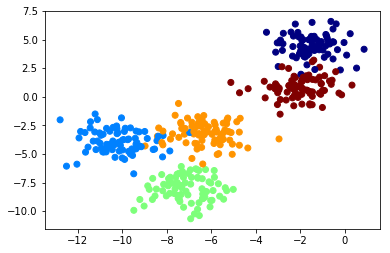

In [3]:
(x_train, y_train), (x_test, y_test) = blobs_classification_dataset(features=2, classes=5, samples=500)

# Visualize
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='jet')
plt.show()

In [4]:
# Initialize and fit the model.
model = DecisionTreeClassifier(max_depth=5)
model.fit(X=x_train, y=y_train)

y_hat = model.predict(x_test)
acc = np.mean(y_hat==y_test)

print("Accuracy on the holdout set: %.2f" % acc)

Accuracy on the holdout set: 0.92


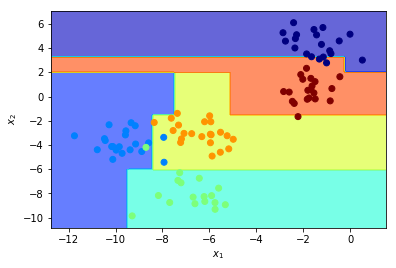

In [5]:
# Visualize decision boundary
ax = plot_decision_boundary(model.predict,
                            x_range=[x_test[:, 0].min()-1, x_test[:, 0].max()+1],
                            y_range=[x_test[:, 1].min()-1, x_test[:, 1].max()+1], classes=5)
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='jet', label='True classes')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### Vanilla regression task:
Fit a sinusoid

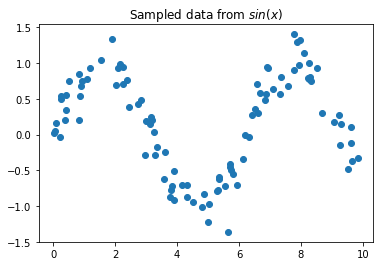

In [21]:
# Generate the data
x_train = np.random.random_sample(100)*10
y_train = np.sin(x_train) + np.random.randn(100)*0.2

# Plot data
plt.plot(x_train, y_train, 'o')
plt.title('Sampled data from $sin(x)$')
plt.show();

We can check how de the maximum depth of the tree is an hyperparameter that gives us some control over the fitness of the tree, too high might overfit, too low can underfit.

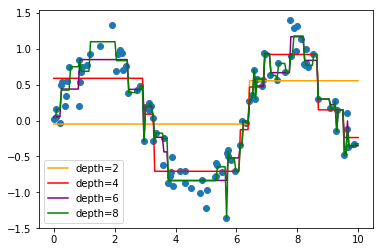

In [22]:
# Initialize and fitregression model
models = [DecisionTreeRegressor(max_depth=i) for i in range(2, 9, 2)]
for model in models:
    model.fit(X=x_train.reshape([-1, 1]), y=y_train)

# Plot regressed line over training data in the original range
x_axis = np.linspace(0, 10, 200)
plt.plot(x_train, y_train, 'o')
colors = ['orange', 'red', 'purple', 'green']
labels = ['depth=2', 'depth=4', 'depth=6', 'depth=8']
for i, model in enumerate(models):
    plt.plot(x_axis, model.predict(x_axis.reshape([-1, 1])), color=colors[i], label=labels[i])
plt.legend()
plt.show()